<a href="https://colab.research.google.com/github/imrib/ImriBregman-HW/blob/main/HW4_Dog%26Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification between dogs and cats using Keras and python
The resolution of the pictures won't be fixed
3 million pictures, we're going to use around 3k pictures
(Coco is a dataset with a lot of pictures, that people annotated)

1k training dog
1k training cat
1k validation set

Research question: Dog or Cat?
we don't need the color picture to differentiate between dogs and cats
Resize the picture using keras function to 150x150, Flatten the picture (150,150,1) normalize the data also
model = Sequential()
model.add(Conv2D(16, 3, padding=’same’, activation=’relu’, input_shape=(150,150,3)

 in the end it also shows the confusion matrix of the train and test
show the accuracy during the training at the end of each epoch

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
62/62 [==============================] - 619s 10s/step - loss: 1.0241 - accuracy: 0.5427 - val_loss: 0.6544 - val_accuracy: 0.6008
Epoch 2/10
62/62 [==============================] - 40s 650ms/step - loss: 0.6566 - accuracy: 0.6037 - val_loss: 0.6231 - val_accuracy: 0.6300
Epoch 3/10
62/62 [==============================] - 37s 602ms/step - loss: 0.5339 - accuracy: 0.7454 - val_loss: 0.5920 - val_accuracy: 0.6724
Epoch 4/10
62/62 [==============================] - 42s 681ms/step - loss: 0.4572 - accuracy: 0.8074 - val_loss: 0.5908 - val_accuracy: 0.6784
Epoch 5/10
62/62 [==============================] - 38s 615ms/step - loss: 0.3695 - accuracy: 0.8679 - val_loss: 0.6071 - val_accuracy: 0.6764
Epoch 6/10
62/62 [==============================] - 43s 695ms/step - loss: 0.2880 - accuracy: 0.9060 - val_loss: 0.6123 - val_accuracy: 0.6784
Epoch 7/10
62/62 [==============================] - 38s 609

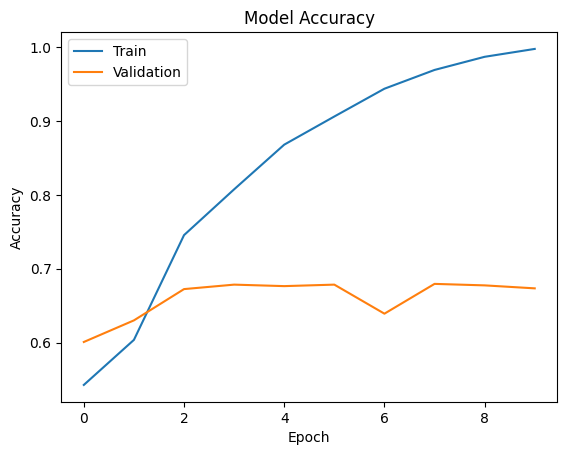

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Define paths
base_dir = "/content/drive/MyDrive/cats_and_dogs_filtered"  # Update with your dataset path
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# Data preparation
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'
)

# Model definition
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Model evaluation
validation_generator.reset()
pred_prob = model.predict(validation_generator)
predictions = np.round(pred_prob)

# Confusion matrix
conf_mat = confusion_matrix(validation_generator.classes, predictions)
print("Confusion Matrix:")
print(conf_mat)

# Plot accuracy during training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
